In [ ]:
#Import

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
cred_df=pd.read_csv("attachment_default.csv")

In [ ]:
cred_df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [ ]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


<AxesSubplot:xlabel='default', ylabel='balance'>

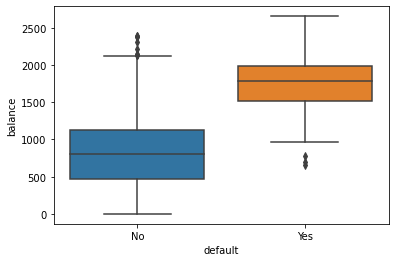

In [ ]:
#Relation between balance and default

sns.boxplot(x='default',y='balance',data=cred_df)

### **observation** People who have more balance have defaulted more in their credit card payment

<AxesSubplot:xlabel='default', ylabel='income'>

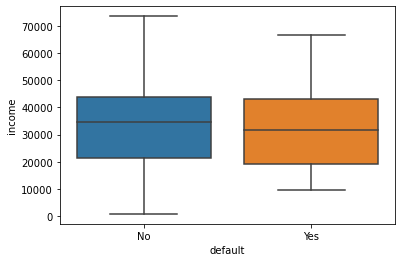

In [ ]:
#Relation between income and default

sns.boxplot(x='default',y='income',data=cred_df)

In [ ]:
### **observation** no significant difference with income

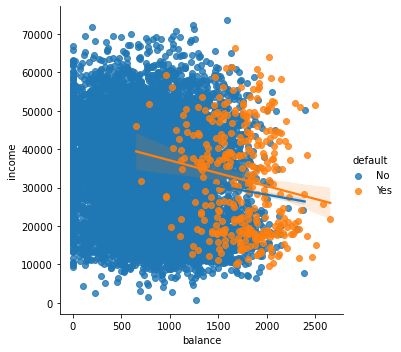

In [ ]:
#Relation between balance and income and whether they have defaulted or not

sns.lmplot(x='balance',y='income',hue='default',data=cred_df)

In [ ]:
#People who have more balance have more defaults

In [ ]:
#Relation between Student and default

pd.crosstab(cred_df['default'],cred_df['student'],rownames=['Default'],colnames=['student'])

student,No,Yes
Default,,
No,6850,2817
Yes,206,127


## 4. Feature Engineering

In [ ]:
default_dummies=pd.get_dummies(cred_df.default,prefix='default',drop_first=True)

In [ ]:
cred_df=pd.concat([cred_df,default_dummies],axis=1)

In [ ]:
cred_df

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0
9996,No,No,757.962918,19660.721768,0
9997,No,No,845.411989,58636.156984,0
9998,No,No,1569.009053,36669.112365,0


In [ ]:
student_dummies=pd.get_dummies(cred_df.student,prefix='student',drop_first=True)
cred_df=pd.concat([cred_df,student_dummies],axis=1)
cred_df

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


## 5. Buidling Model with Single Feature

### 5.1 Training a simple linear regression

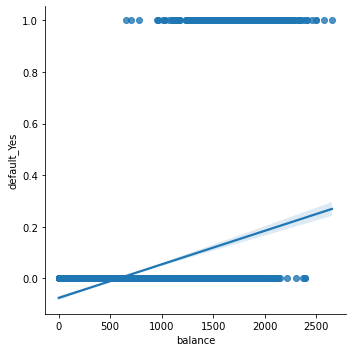

In [ ]:
sns.lmplot(x='balance',y='default_Yes',data=cred_df)

In [ ]:
#Build LR Model and the coeff

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X= cred_df[['balance']]
Y=cred_df['default_Yes']

linreg=LinearRegression()
linreg.fit(X,Y)

print(linreg.coef_)
print(linreg.intercept_)

[0.00012987]
-0.07519195884622262


## 5.2 Training a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X= cred_df[['balance']]
Y=cred_df['default_Yes']

logreg=LogisticRegression()
logreg.fit(X,Y)

print(logreg.coef_)
print(logreg.intercept_)

[[0.00549892]]
[-10.65132824]


Text(0.5, 1.0, 'X input vs y_pred')

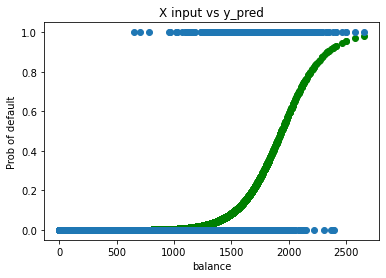

In [ ]:
#Visualize this

y_pred=logreg.predict_proba(X)
plt.scatter(X.values,y_pred[:,1],color='green')
plt.scatter(X.values,Y)

plt.xlabel('balance')
plt.ylabel('Prob of default')
plt.title('X input vs y_pred')

In [ ]:
cred_df

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [ ]:
cred_df.drop(['default','student'],axis=1,inplace=True)

In [ ]:
cred_df

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


# Log Reg with Multiple Features

In [ ]:
#splitting the data
X=cred_df.drop('default_Yes',axis=1)
y=cred_df['default_Yes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [ ]:
logreg=LogisticRegression(C=0.6)

In [ ]:
"""A high value of C tells the model to give more weight to the training data. 
A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, 
whereas low value is just the opposite of this."""

'A high value of C tells the model to give more weight to the training data. \nA lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, \nwhereas low value is just the opposite of this.'

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.6)

In [ ]:
y_pred_test=logreg.predict(X_test)

In [ ]:
y_pred_train=logreg.predict(X_train)

In [ ]:
from sklearn import metrics

print("Test Accuracy: ",metrics.accuracy_score(y_test,y_pred_test))

Test Accuracy:  0.9683333333333334


In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print("Training Accuracy: ",metrics.accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.9665714285714285


In [ ]:
conf=metrics.confusion_matrix(y_test,y_pred_test)

In [ ]:
conf

array([[2887,   19],
       [  76,   18]], dtype=int64)

In [ ]:
cr=metrics.classification_report(y_test,y_pred_test)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2906
           1       0.49      0.19      0.27        94

    accuracy                           0.97      3000
   macro avg       0.73      0.59      0.63      3000
weighted avg       0.96      0.97      0.96      3000

